In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from collections import Counter

In [142]:
df = pd.read_csv('megafon.csv')#ссчитываем данные в датафрейм

In [143]:
Counter(df['Q1'])#Смотрим на уникальные значения так как список значений условно дискретный

Counter({'5': 234,
         '1': 532,
         '8': 291,
         '2': 168,
         '3': 325,
         '9': 238,
         '10': 846,
         '7': 200,
         '4': 123,
         '11': 1,
         '6': 101,
         '2, 9': 1,
         '0': 10,
         '1, 3': 2,
         '19': 1,
         '15': 1,
         nan: 2,
         '1, 6': 1,
         '***** ** ***': 1,
         '3 - дер.Ширяево Волоколамского района, 9 - в Москве': 1,
         '10, 9': 1,
         'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !': 1,
         'ОЦЕНКА-3/НЕВАЖНО/': 1,
         'Отвратительно': 1,
         'Я ценой услуг не удовлетворен': 1,
         'Пока не понял': 1,
         '3, 9': 1,
         '5, 6': 2,
         '0, 1, 5': 1,
         '5, 7': 1,
         'Hi': 1,
         '4. Тульская область Заокский район. Романовские дачи связи почти нет': 1,
         'Немагу дать атценку денги незашто снимаеть скоро выклучаю': 1,
         '10, 50': 1,
         'Очень  хорошо. Обслуживания  я довольно. Спасибо 

In [144]:
#фильтруем значения колонки Q1
df = df[
    (df['Q1'] == '1') | (df['Q1'] == '2') | (df['Q1'] == '3') |
    (df['Q1'] == '4') | (df['Q1'] == '5') | (df['Q1'] == '6') |
    (df['Q1'] == '7') | (df['Q1'] == '8') | (df['Q1'] == '9') |
    (df['Q1'] == '10')
        ]

In [145]:
Counter(df['Q2'])

Counter({nan: 1743,
         '4': 170,
         '3': 190,
         '2, 3, 4': 11,
         '4, 5': 30,
         '1, 3, 4': 76,
         '1, 3, 4, 5': 40,
         '1, 3': 121,
         '3, 4': 85,
         '1, 2': 22,
         '3, 5': 8,
         '1': 168,
         '7': 64,
         '1, 4': 56,
         '1, 2, 3, 4, 5': 27,
         '2, 3': 12,
         '1, 2, 3, 4': 18,
         '2, 3, 4, 5': 3,
         '3, 4, 5': 45,
         '1, 2, 5': 3,
         '1, 5': 7,
         '1, 2, 4': 11,
         '6': 10,
         '1, 4, 5': 27,
         '1, 2, 3': 44,
         '2, 5': 1,
         '2, 4, 5': 2,
         '1, 2, 7': 1,
         '5': 9,
         '2': 11,
         '1, 2, 3, 4, 5, 6': 2,
         '0, 1, 7': 1,
         '4, 7': 1,
         '1, 4, 7': 3,
         '0, 3': 1,
         '1, 3, 4, 5, 7': 2,
         '3, 7': 2,
         '1, 3, 4, 7': 2,
         '3, 4, 5, 7': 3,
         '2, 4': 4,
         '5, 6': 1,
         '1, 2, 3, 5': 4,
         '1, 3, 5': 3,
         '1, 2, 34': 1,
         '

In [146]:
for i, q in enumerate(df['Q1']):
  if int(q) <= 8:
    df.loc[i, 'Score'] = 'Low'
  else:
    df.loc[i, 'Score'] = 'High'
#Создаем новую колонку для фильтрации респондентов по первому вопросу

In [147]:
#Проверяем тип распределения данных в первой характеристике
statistic, pvalue = stats.shapiro(df['Total Traffic(MB)'])
statistic, pvalue
pvalue < 0.5

False

In [148]:
import statsmodels.api as st
names = [i for i in df.columns if (i not in ['user_id', 'Q1', 'Q2', 'Score'])]

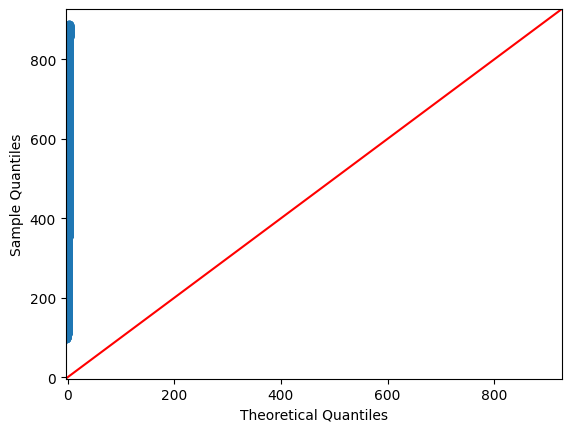

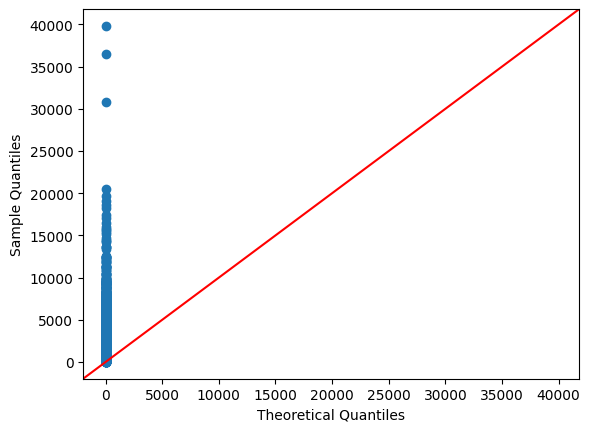

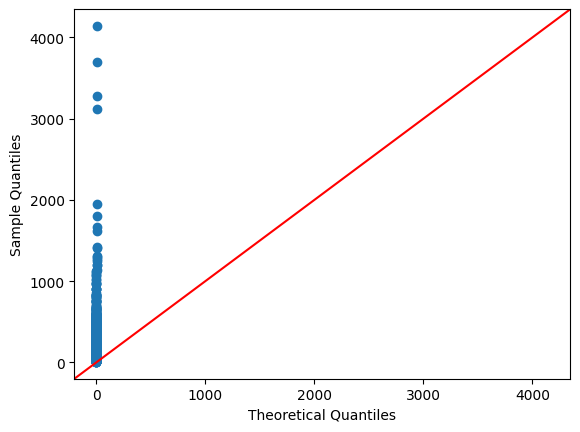

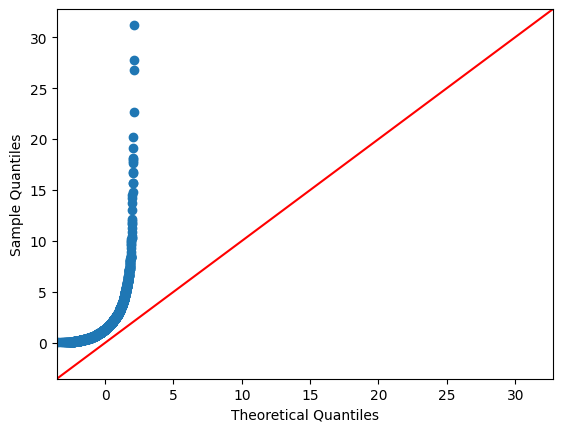

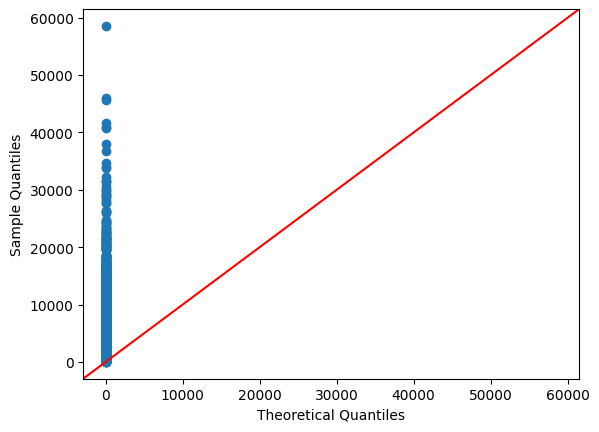

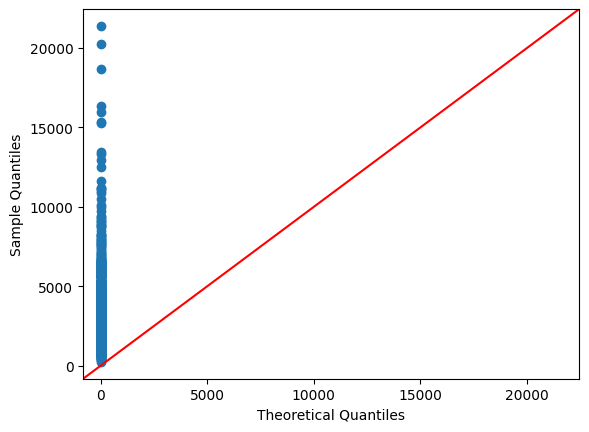

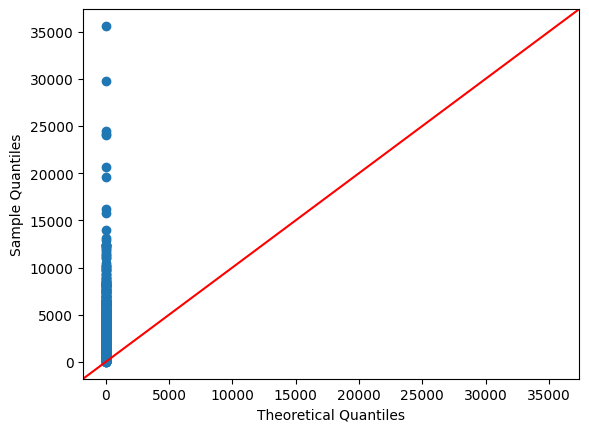

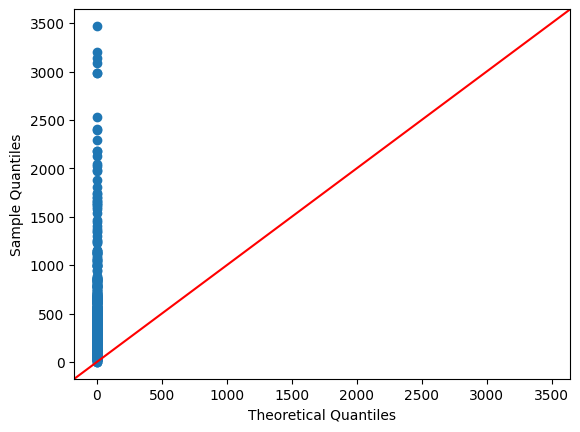

In [149]:
for i in names:
  fig = st.qqplot(df[i].values, line='45')
fig.show()
#Распределение не является нормальным

In [150]:
#Проверяем статистические показатели данных
df['Total Traffic(MB)'].describe()

count    3058.000000
mean      405.754542
std       220.475485
min       100.026680
25%       213.006655
50%       363.753705
75%       572.792975
max       887.078270
Name: Total Traffic(MB), dtype: float64

In [203]:
#Строим бутстрап для проверки альтернативной гипотезы о том, что медианы выборки с высокой оценкой больше медианы выборки с низкой оценкой
def bootstrap_median(s1, s2, n=1500, statistic=np.median, c_level=0.95):
  len_df = max(len(s1), len(s2))
  boot_df = list()
  for i in range(n):
    s1_sample = s1.sample(len_df, replace=True).values
    s2_sample = s2.sample(len_df, replace=True).values
    boot_df.append(statistic(s1_sample) - statistic(s2_sample))

  boot_df = pd.DataFrame(boot_df)

  left_quant = (1 - c_level) / 2
  right_quant = 1 - left_quant
  quantiles = boot_df.quantile([left_quant, right_quant])

  p_value = stats.norm.cdf(x=0, loc=boot_df.mean(), scale=boot_df.std())

  bar_height, x, bars = plt.hist(boot_df, bins=60)

  for bar in bars:
    if bar.get_x() < 0:
      bar.set_facecolor('red')
      bar.set_edgecolor('black')
    else:
      bar.set_facecolor('grey')
      bar.set_edgecolor('black')

  plt.vlines(quantiles, ymin=0, ymax=100, linestyle='--')
  plt.xlabel('value')
  plt.ylabel('count')
  plt.title(f'Bootstrap {s1.name} values histogram')
  plt.show()

  return (boot_df, p_value, dif_value)

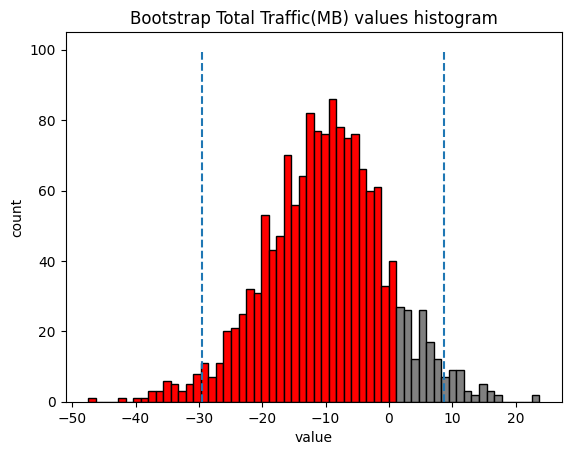

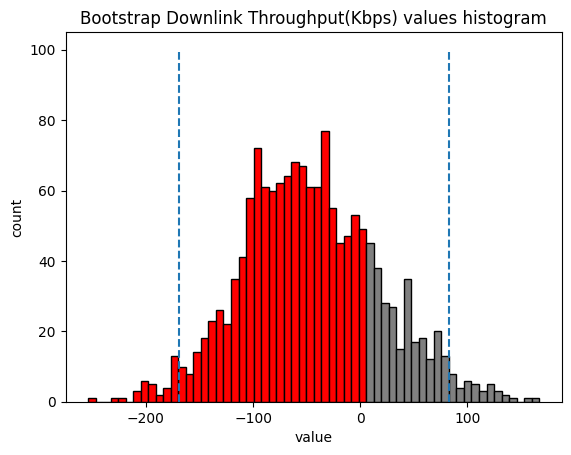

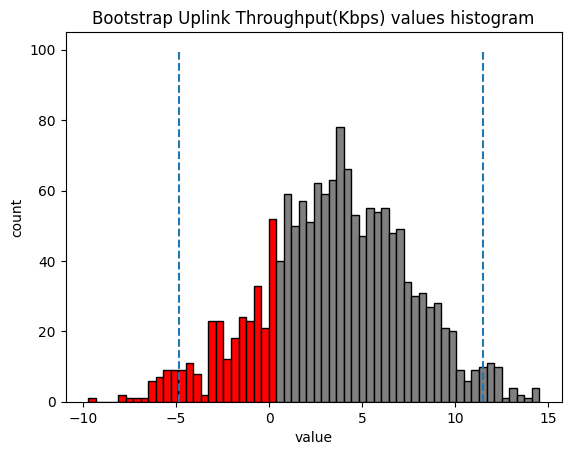

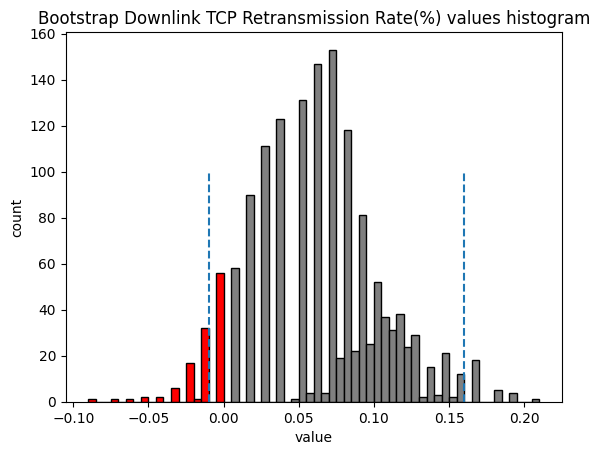

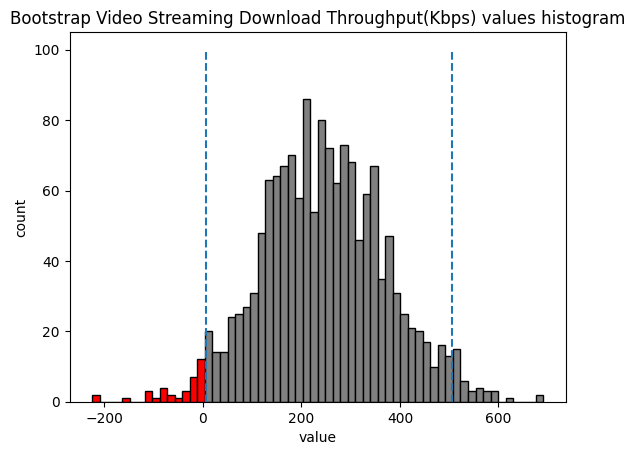

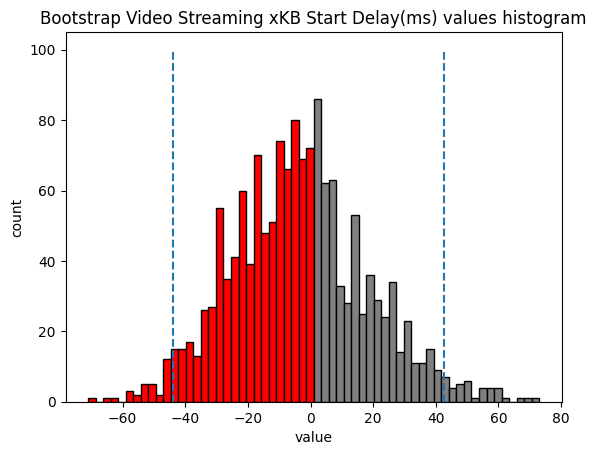

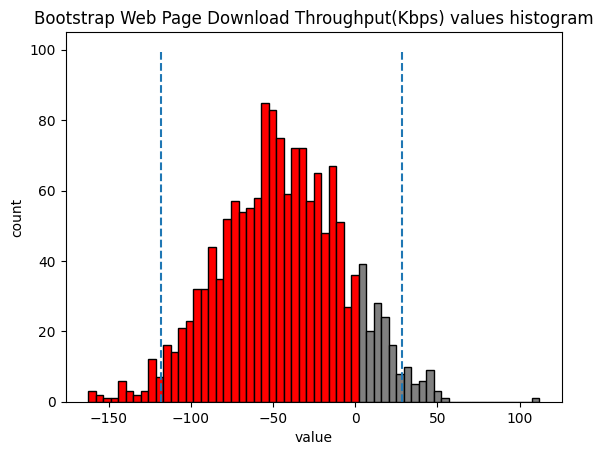

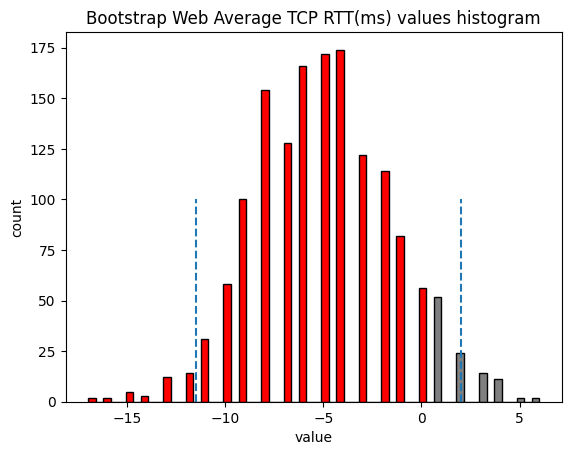

In [159]:
result_dict = dict()

for i in names:
  temp_df = df[df[i].notnull()]
  s1 = temp_df[temp_df['Score'] == 'High'][i]
  s2 = temp_df[temp_df['Score'] == 'Low'][i]
  result_dict[i] = bootstrap_median(s1, s2)

In [160]:
for name, i in zip(result_dict, result_dict.values()):
  print(f'{name} p value =', i[1])
  print(f'Разница в средних выборок: {i[2]}\n')
#Статистически значимая разница(pvalue < 5%, 0 не находится в пределах доверительного интервала) наблюдается только у показателя Video Streaming Download Throughput(Kbps))

Total Traffic(MB) p value = [0.85295379]
Разница в средних выборок: 9.719260954872468

Downlink Throughput(Kbps) p value = [0.76498245]
Разница в средних выборок: 9.719260954872468

Uplink Throughput(Kbps) p value = [0.18218412]
Разница в средних выборок: 9.719260954872468

Downlink TCP Retransmission Rate(%) p value = [0.06571776]
Разница в средних выборок: 9.719260954872468

Video Streaming Download Throughput(Kbps) p value = [0.02630511]
Разница в средних выборок: 9.719260954872468

Video Streaming xKB Start Delay(ms) p value = [0.56603508]
Разница в средних выборок: 9.719260954872468

Web Page Download Throughput(Kbps) p value = [0.88071011]
Разница в средних выборок: 9.719260954872468

Web Average TCP RTT(ms) p value = [0.9212621]
Разница в средних выборок: 9.719260954872468



In [ ]:
Counter(df['Q2'])

In [200]:
df_2 = df
df['bad_call'] = 0
df['bad_time_call'] = 0
df['bad_cell_buliding'] = 0
df['slow_mobile_internet'] = 0
df['slow_video'] = 0
df['idk'] = 0
df['other'] = 0

In [201]:
#теперь создаем выборки с учетом ответов на второй вопрос:

for i, q in zip(df_2.index, df_2['Q2']):
  if ('1' in str(q)):
    df_2.loc[i, 'bad_call'] = True

  if ('2' in str(q)):
    df_2.loc[i, 'bad_time_call'] = True

  if ('3' in str(q)):
    df_2.loc[i, 'bad_cell_buliding'] = True

  if ('4' in str(q)):
    df_2.loc[i, 'slow_mobile_internet'] = True

  if ('5' in str(q)):
    df_2.loc[i, 'slow_video'] = True

  if ('6' in str(q)):
    df_2.loc[i, 'idk'] = True

  if ('7' in str(q)):
    df_2.loc[i, 'other'] = True

In [ ]:
по первому вопросу проверяем только качес

In [202]:
temp = ['bad_call', 'bad_time_call', 'bad_cell_buliding', 'slow_mobile_internet', 'slow_video', 'idk', 'other']
df_names = df_2[names + temp]
df_names.fillna(0)
df_names.corr()[names].loc[temp]

,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
bad_call,-0.012951,-0.015238,-0.009245,0.024990,-0.001801,0.071296,0.014524,0.018099
bad_time_call,-0.016651,-0.030103,-0.010313,0.031645,-0.006844,0.007482,-0.031459,0.034135
bad_cell_buliding,-0.003287,-0.052228,-0.033160,0.028438,-0.052566,0.039534,-0.022611,0.027175
slow_mobile_internet,0.021068,-0.086801,-0.051674,0.071223,-0.122932,0.108248,-0.068114,0.129058
slow_video,0.019436,-0.072391,-0.050230,0.072968,-0.096683,0.034032,-0.076874,0.086183
idk,0.020786,0.030759,-0.015808,-0.008756,0.011092,-0.006832,-0.011553,-0.010433
other,-0.001462,-0.008988,0.008349,0.030714,-0.006799,0.009648,-0.008283,0.014310


In [205]:
# Видим корреляцию в ответах медленный мобильный интернет и параметрах:
# 'Video Streaming Download Throughput(Kbps)',
#'Video Streaming xKB Start Delay(ms)',
#'Web Average TCP RTT(ms)'

problem_list = ['Video Streaming Download Throughput(Kbps)', 'Video Streaming xKB Start Delay(ms)', 'Web Average TCP RTT(ms)']

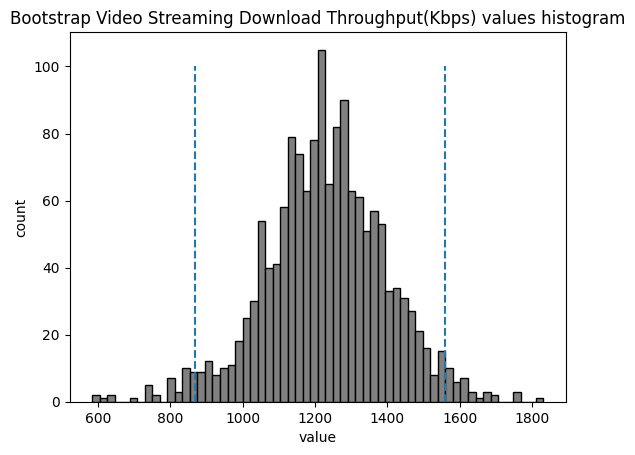

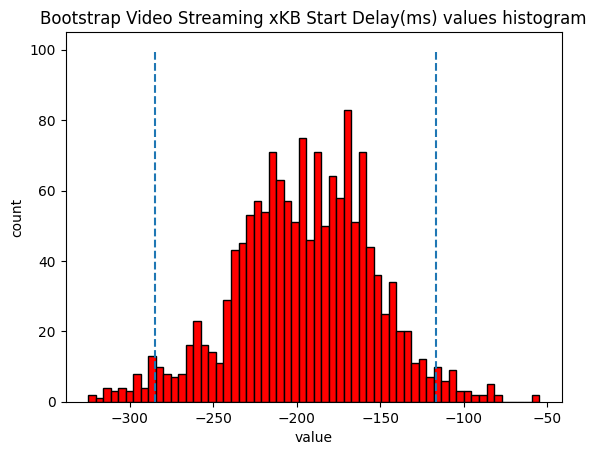

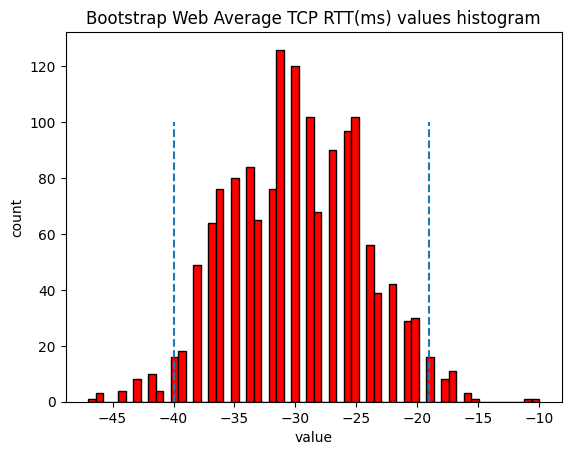

In [206]:
problem_dict = dict()

for i in problem_list:
  temp_df = df_2[df_2[i].notnull()]
  s1 = temp_df[temp_df['Score'] == 'High'][i]
  s2 = temp_df[temp_df['slow_mobile_internet'] == True][i]
  problem_dict[i] = bootstrap_median(s1, s2)

In [208]:
for name, i in zip(problem_dict, problem_dict.values()):
  print(f'{name} p value =', i[1])

#Видим значимую разницу параметра Video Streaming Download Throughput(Kbps)

Video Streaming Download Throughput(Kbps) p value = [1.15083782e-13]
Video Streaming xKB Start Delay(ms) p value = [0.9999989]
Web Average TCP RTT(ms) p value = [0.99999997]
